---

# <center>Classificação de CIFAR-10 com ResNet18:<br> Uma Implementação em PyTorch 2.0, Lightning e Torchvision</center>

---

## 📚 1. Introdução

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Caro explorador do universo da Inteligência Artificial, é com grande entusiasmo que lhe convido a embarcar nesta jornada pelo meu projeto de Reconhecimento de Imagens utilizando a arquitetura ResNet. Este trabalho é mais do que um simples projeto, é um marco em minha odisseia profissional e estou ansioso para compartilhar cada detalhe desta aventura com você.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Nesta expedição, navegaremos pelas águas das bibliotecas Python Pytorch 2.0, Lightning e Torchvision, ferramentas poderosas que nos auxiliarão a construir um modelo de aprendizado profundo para reconhecimento de imagens. Nosso navio é a arquitetura ResNet, uma verdadeira obra-prima da engenharia de aprendizado de máquina, conhecida por sua robustez e eficácia em tarefas de visão computacional.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Nosso mapa do tesouro é o conjunto de dados CIFAR10. Este conjunto é como uma bússola para a comunidade de aprendizado de máquina, composto por 60.000 imagens coloridas de 32x32 distribuídas em 10 classes distintas, cada uma contendo um total de 6.000 imagens. É neste vasto oceano de dados que treinaremos e avaliaremos nosso modelo.</p>

## 📦 2. Instalação & Carga de Pacotes 

<div style="background-color: #f0f0f0; padding: 10px; border-radius: 10px; margin: 10px;">
<ol>
    
<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>os</strong>: Módulo Python para interação com o sistema operacional.</p></li>
    
<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>math</strong>: Módulo Python para tarefas matemáticas.</p></li>

<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>torch</strong>: Biblioteca de aprendizado de máquina, usada para aplicações como processamento de linguagem natural.</p></li>
    
<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>pickle</strong>: Módulo Python para serialização e des-serialização de estruturas de objetos Python.</p></li>
    
<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>numpy</strong>: Biblioteca Python para suporte a grandes arrays e matrizes multidimensionais.</p></li>

<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>pandas</strong>: Biblioteca de software para manipulação e análise de dados.</p></li>

<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>seaborn</strong>: Biblioteca de visualização de dados Python baseada em matplotlib.</p></li>

<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>matplotlib</strong>: Biblioteca de plotagem para Python.</p></li>

<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>lightning</strong>: Wrapper leve do PyTorch para pesquisa de IA de alto desempenho.</p></li>

<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>torchvision</strong>: Pacote do PyTorch que consiste em conjuntos de dados populares, arquiteturas de modelos e transformações comuns de imagens para visão computacional.</p></li>
    
<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>torchmetrics</strong>: Biblioteca PyTorch de métricas para modelos de aprendizado de máquina e aprendizado profundo.</p></li>
    
<li><p style="font-family: 'serif'; font-size: 16px; text-align: justify;"><strong>pkg_resources</strong>: O módulo pkg_resources distribuído com setuptools fornece uma API para bibliotecas Python acessarem seus arquivos de recursos, e para aplicações e frameworks extensíveis descobrirem automaticamente plugins.</p></li>
    
</ol>
</div>

### 2.1 Instalação de Pacotes

In [1]:
# !pip install toch
# !pip install lightning
!pip install scikit-learn

### 2.2 Carga de Pacotes

In [18]:
# Pacotes para Configuração do Ambiente de Desenvolvimento
import os
import pickle
import warnings
import pkg_resources

# Pacotes para Matemática e Análise de Dados
import numpy as np
import pandas as pd

# Pacotes para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Torchvision
import torchvision
from torchvision import models
from torchvision import transforms
from torchvision.datasets import CIFAR10

# Pytorch
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

# Métrica de Avaliação (Acurácia)
from torchmetrics.classification import Accuracy
from sklearn.metrics import classification_resport

# Lightning para Pesquisa de IA de Alto Desempenho
import lightning as pl
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint

ModuleNotFoundError: No module named 'sklearn'

In [3]:
# Ignorando avisos
warnings.filterwarnings("ignore")

### 2.2 Checando Versões dos Pacotes

In [4]:
# Lista de pacotes importados
packages = ['torch', 'numpy', 'pandas', 'seaborn', 'lightning', 'matplotlib', 'torchvision', 'torchmetrics']

# Imprimindo as versões dos pacotes
print("------= Verões Utilizadas =------")
for package in packages:
    version = pkg_resources.get_distribution(package).version
    print(f" - {package}: {version}")
print("---------------------------------")

------= Verões Utilizadas =------
 - torch: 2.0.1
 - numpy: 1.26.0
 - pandas: 2.1.1
 - seaborn: 0.12.2
 - lightning: 2.0.9
 - matplotlib: 3.8.0
 - torchvision: 0.15.2
 - torchmetrics: 1.1.2
---------------------------------


## 💻 3. Configuração de Ambiente

### 3.1 Reprodutibilidade dos Experimentos

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A função `set_seed` é usada para definir a semente para geradores de números aleatórios no NumPy e PyTorch. Isso é útil para garantir que os experimentos sejam reproduzíveis, ou seja, que os mesmos resultados sejam obtidos sempre que o código for executado com a mesma semente.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Aqui estão as funcionalidades de cada parte do código:</p>

<ol>
  <li><p style="font-family: 'Times New Roman', 'Times', 'serif'; font-size: 17px; text-align: justify;"><code>torch.manual_seed(seed)</code>: Define a semente para o gerador de números aleatórios do PyTorch para a CPU.</p></li>
  <li><p style="font-family: 'Times New Roman', 'Times', 'serif'; font-size: 17px; text-align: justify;"><code>os.environ['PYTHONHASHSEED'] = str(seed)</code>: Define a semente para as funções hash do Python.</p></li>
  <li><p style="font-family: 'Times New Roman', 'Times', 'serif'; font-size: 17px; text-align: justify;"><code>if torch.cuda.is_available()</code>: Verifica se uma GPU está disponível.</p></li>
  <li><p style="font-family: 'Times New Roman', 'Times', 'serif'; font-size: 17px; text-align: justify;"><code>torch.cuda.manual_seed_all(seed)</code>: Define a semente para todas as GPUs disponíveis.</p></li>
  <li><p style="font-family: 'Times New Roman', 'Times', 'serif'; font-size: 17px; text-align: justify;"><code>torch.backends.cudnn.deterministic = True</code>: Garante que o backend cuDNN use apenas algoritmos determinísticos.</p></li>
  <li><p style="font-family: 'Times New Roman', 'Times', 'serif'; font-size: 17px; text-align: justify;"><code>torch.backends.cudnn.benchmark = False</code>: Desativa o uso de um algoritmo de convolução heurístico.</p></li>
</ol>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A chamada `set_seed(seed=1996)` no final do bloco de código é usada para aplicar a semente definida à função.</p>

In [5]:
# Reprodutibilidade dos Exeperimentos
def set_seed(seed=1996):
    
    # CPU
    np.random.seed(seed)
    torch.manual_seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
    # GPU
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed=seed)
        pl.seed_everything(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benckmark     = False
        
# Chamando a função set_seed()
set_seed()

In [6]:
# Dispositivo usado
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo usado: {device}")

Dispositivo usado: cpu


### 3.2 Recursos de GPU (CUDA)

In [7]:
# Imprimindo os recursos de GPU usados se tiver disponível
!nvidia-smi

zsh:1: command not found: nvidia-smi


## 🖼️ 4. Carregamento e Pré-processamento de Imagens

<ol>
    <li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><b>Média e Desvio Padrão:</b> O objetivo é criar uma classe Python que calcule a média e o desvio padrão das imagens originais. Esses valores são importantes porque serão usados posteriormente para padronizar as imagens.</p></li>

<li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><b>Criação dos Transformadores:</b> Após calcular a média e o desvio padrão, o próximo passo é criar os transformadores. Estamos utilizando o módulo <code>torchvision.transforms</code> para isso. Os transformadores são usados para aplicar transformações nas imagens, como redimensionamento, recorte, normalização, etc. Neste caso, estamos utilizando a média e o desvio padrão obtidos na etapa anterior para padronizar as imagens. A padronização é uma técnica comum de pré-processamento de dados que ajuda a acelerar o treinamento e a convergência dos modelos de aprendizado de máquina.</p></li>
    
<li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><b>Normalização:</b> A normalização é realizada usando a seguinte fórmula:</p>
    
<p>$$x^{'} = \frac{x - \bar{x}}{\sigma}$$</p></li>

<li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><b>Criação dos DataLoaders:</b> Finalmente, criamos os DataLoaders com o conjunto de dados CIFAR-10. Os DataLoaders são usados para carregar os dados em lotes durante o treinamento do modelo. Eles também podem embaralhar os dados e aplicar transformações. Neste caso, estamos utilizando o DataLoader para carregar as imagens do CIFAR-10 que foram padronizadas na etapa anterior.</p></li>
</ol>



### 4.1 Obtendo os DataLoaders 

In [8]:
class GetDataLoaders(object):
    
    # Método de construção
    def __init__(self):
        self.BATCH_SIZE  = 126 if torch.cuda.is_available() else 64
        self.NUM_WORKERS = int(os.cpu_count() / 2)
        
    # Obtendo a média e o desvio padrão
    def get_mean_and_std(self):
        
        # Carregando os dados originais
        trainset  = CIFAR10(root="./data", train=True, transform=transforms.ToTensor(), download=True)
        traindata = DataLoader(dataset=trainset, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)
        
        # Obtendo o número de canais de cores das imagens
        n_channels = next(iter(traindata))[0].size(1)
        
        # Criando os tensores para armazenar a média e desvio padrão para cada canal de cor
        mean, std = torch.zeros(n_channels), torch.zeros(n_channels)
        
        # Cálculo da média e do desvio padrão
        for inputs, targets in traindata:
            for i in range(n_channels):
                mean[i] += inputs[:, i, :,:].mean()
                std[i]  += inputs[:, i, :,:].std()
        mean.div_(len(traindata))
        std.div_(len(traindata))
        
        # Retornando a média e o desvio padrão
        return mean, std
    
    # Obtendo os transformadores dos dados
    def get_transforms(self):
        
        # Obtendo a média e o desvio padrão das imagens
        mean, std = self.get_mean_and_std()
        
        # Transformador de treino
        train_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
        
        # Transformador de validação
        valid_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
        
        # Retornando os transformadores
        return train_transform, valid_transform
    
    # Obtendo os DataLoaders
    def get_dataloaders(self):
        
        # Carregando os transformadores
        train_transform, valid_transform = self.get_transforms()
        
        # Carregando e aplicando transformações aos dados de treino e validação
        # -= Treino =-
        trainset   = CIFAR10(root="./data", train=True, transform=train_transform, download=True)
        train_data = DataLoader(dataset=trainset, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)
        
        # -= Validação =-
        validset   = CIFAR10(root="./data", train=False, transform=train_transform, download=True)
        valid_data = DataLoader(dataset=validset, batch_size=self.BATCH_SIZE, shuffle=True, num_workers=self.NUM_WORKERS)
        
        # Retornando os DataLoaders de treino e validação
        return train_data, valid_data
    
# Carregando os DataLoaders
train_data, valid_data = GetDataLoaders().get_dataloaders()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


### 4.2 Visualizando Imagens do CIFAR-10 Transformadas

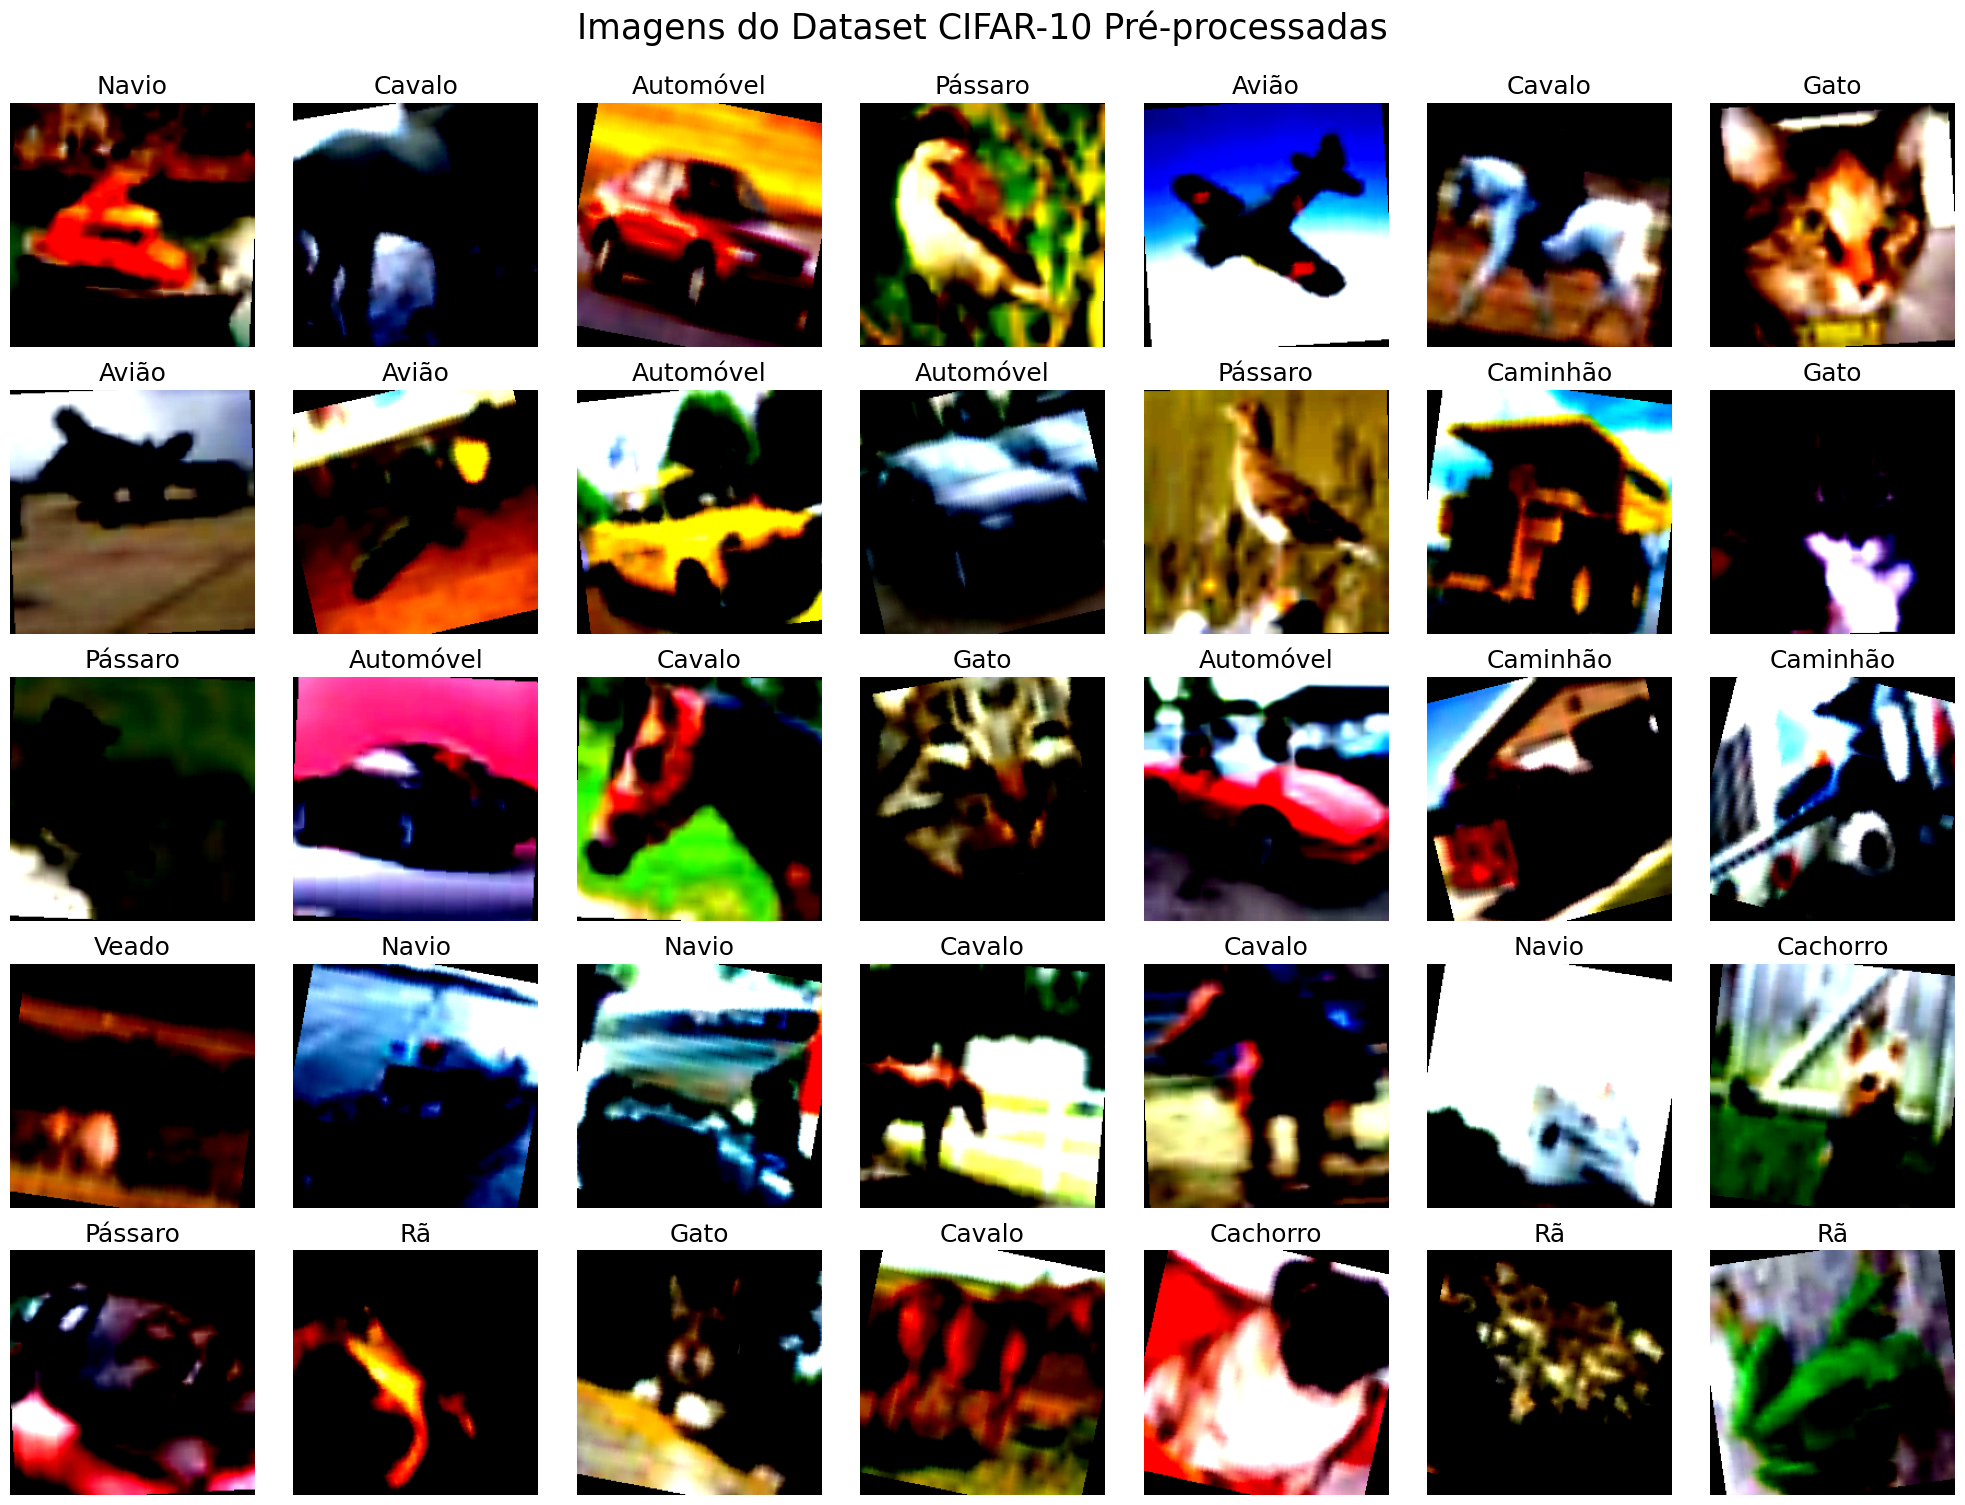

In [9]:
# Lista dos nomes das classes do CIFAR-10
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Veado', 'Cachorro', 'Rã', 'Cavalo', 'Navio', 'Caminhão']

# Carrega primeiro batch de imagens
images, labels = next(iter(train_data))

# Visualizando as primeiras imagens
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(20, 15))
fig.suptitle("Imagens do Dataset CIFAR-10 Pré-processadas", fontsize=25, y=1) 

for i, ax in enumerate(axes.flatten()):
    img = images[i].numpy()
    img = np.transpose(img, (1, 2, 0)) # Transpõe a imagem

    # Recorta os valores dos dados da imagem para o intervalo [0, 1]
    img = np.clip(img, 0, 1)

    ax.imshow(img)
    ax.set_title(classes[labels[i]], size=18)  # Adiciona o título da imagem
    ax.axis("off")

plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajustar a distância vertical e horizontal entre as subtramas
plt.tight_layout()
plt.show()

## 🧬 5. Visão Geral da Arquitetura ResNet

<h3>5.1 Introdução à ResNet</h3>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A ResNet, ou Rede Residual, é uma arquitetura de rede neural convolucional que se tornou uma referência no campo da visão computacional. Proposta pelos pesquisadores Kaiming He, Xiangyu Zhang, Shaoqing Ren e Jian Sun em 2015, a ResNet introduziu o conceito de "conexões residuais", que permitem o treinamento eficaz de redes muito mais profundas do que era possível anteriormente.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">As redes neurais convolucionais tradicionais tentam aprender representações de nível superior à medida que aprofundam a rede, com cada camada tentando aprender algo novo. No entanto, à medida que essas redes se tornam mais profundas, elas começam a sofrer de um problema conhecido como "desaparecimento do gradiente", onde as camadas mais profundas da rede são incapazes de aprender efetivamente.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A ResNet aborda esse problema através de suas conexões residuais, que efetivamente permitem que os gradientes sejam retropropagados para camadas mais anteriores. Isso significa que, em vez de tentar aprender uma representação inteiramente nova em cada camada, cada camada na ResNet aprende apenas a diferença (ou "resíduo") entre sua entrada e saída. Isso permite que a ResNet treine redes significativamente mais profundas, com muitos modelos ResNet tendo centenas ou mesmo milhares de camadas.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Desde a sua introdução, a ResNet tem sido amplamente utilizada em uma variedade de aplicações de visão computacional, desde o reconhecimento de imagens até a detecção de objetos, e continua a ser uma das arquiteturas de rede neural convolucional mais populares e influentes até hoje.</p>

<h3>5.2 Conexões Residuais</h3>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">As conexões residuais são a inovação central da arquitetura ResNet e são a razão pela qual a ResNet pode treinar redes muito mais profundas do que as arquiteturas anteriores.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Em uma rede neural convencional, cada camada aprende uma nova representação da entrada. No entanto, à medida que a rede se torna mais profunda, isso pode se tornar um problema. As camadas mais profundas têm que aprender representações cada vez mais complexas e, eventualmente, a rede pode sofrer do problema do "desaparecimento do gradiente", onde as camadas mais profundas têm dificuldade em aprender.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A ideia por trás das conexões residuais é contornar esse problema. Em vez de cada camada aprender uma nova representação, cada camada em uma ResNet aprende apenas a diferença, ou "resíduo", entre sua entrada e saída. Isso é feito adicionando a entrada original diretamente à saída da camada (daí o nome "conexão residual").</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Matematicamente, se a entrada para uma camada é x e a função que a camada aprende é F(x), então a saída da camada em uma rede convencional seria $F(x)$. Em uma ResNet, a saída seria F(x) + x. Isso significa que a função F(x) não precisa aprender a representação completa; ela só precisa aprender o resíduo.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Essa abordagem simples, mas poderosa, permite que a ResNet treine redes com centenas ou mesmo milhares de camadas, superando o problema do desaparecimento do gradiente.</p>

<h3>5.3 Blocos Residuais</h3>
    
<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Os blocos residuais são os componentes fundamentais da arquitetura ResNet. Cada bloco residual consiste em uma série de camadas convolucionais e uma "conexão de atalho" que pula essas camadas.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Em um bloco residual, a entrada passa por uma série de camadas convolucionais, cada uma seguida por uma função de ativação não linear. No entanto, em vez de passar a saída dessas camadas diretamente para a próxima camada, a entrada original é adicionada à saída das camadas convolucionais. Isso é chamado de "conexão de atalho" ou "conexão residual".</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Matematicamente, se a entrada para o bloco residual é $x$ e a saída das camadas convolucionais é $F(x)$, então a saída do bloco residual é $F(x) + x$. Isso significa que o bloco residual está realmente aprendendo a função $F(x) = y - x$, onde $y$ é a saída desejada. Em outras palavras, o bloco residual está tentando aprender o "resíduo" ou a diferença entre a entrada e a saída desejada.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Essa estrutura permite que a ResNet treine redes muito mais profundas do que seria possível com redes neurais convencionais. Ao adicionar a entrada original à saída das camadas convolucionais, a ResNet pode efetivamente evitar o problema do "desaparecimento do gradiente", onde as camadas mais profundas da rede têm dificuldade em aprender devido à diminuição dos gradientes durante a retropropagação.</p><br>

<center><img src="https://miro.medium.com/v2/resize:fit:1122/1*RTYKpn1Vqr-8zT5fqa8-jA.png"></center>

<h3>5.4 Profundidade da ResNet</h3>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A profundidade de uma rede neural se refere ao número de camadas que ela possui. Uma das principais vantagens da ResNet é a sua capacidade de suportar redes muito mais profundas do que as arquiteturas anteriores.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">As redes neurais convencionais tendem a sofrer de um problema conhecido como "desaparecimento do gradiente" à medida que se tornam mais profundas. Isso ocorre porque, durante o treinamento, os gradientes que são retropropagados para as camadas mais antigas tendem a se tornar muito pequenos. Como resultado, as camadas mais antigas da rede têm dificuldade em aprender.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A ResNet aborda esse problema através do uso de conexões residuais. Ao adicionar a entrada original diretamente à saída de cada bloco residual, a ResNet permite que os gradientes sejam retropropagados diretamente através da rede. Isso permite que a ResNet treine redes com centenas ou mesmo milhares de camadas.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Existem várias variantes da ResNet, cada uma com um número diferente de camadas. Por exemplo, a ResNet-18 tem 18 camadas, a ResNet-34 tem 34 camadas, a ResNet-50 tem 50 camadas, e assim por diante. Em geral, as redes mais profundas são capazes de aprender representações mais complexas, mas também são mais difíceis de treinar e mais propensas a overfitting.</p>

<h3>5.5 Treinamento da ResNet</h3>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">O treinamento da ResNet é semelhante ao de outras redes neurais convolucionais. O processo começa com a inicialização dos pesos da rede, geralmente com pequenos valores aleatórios. Em seguida, a rede é treinada iterativamente usando um conjunto de dados de treinamento. Em cada iteração, a rede faz uma previsão com base em sua entrada atual, e essa previsão é comparada com a verdadeira saída usando uma função de perda. A função de perda quantifica o quão longe a previsão está da verdadeira saída.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Os gradientes da função de perda em relação aos pesos da rede são então calculados usando a retropropagação. Esses gradientes são usados para atualizar os pesos da rede na direção que minimiza a função de perda. Este processo é repetido muitas vezes até que a rede seja capaz de fazer previsões precisas sobre os dados de treinamento.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Um aspecto importante do treinamento da ResNet é a escolha do otimizador. O otimizador determina como os pesos da rede são atualizados com base nos gradientes calculados. Alguns otimizadores comuns usados no treinamento da ResNet incluem SGD (Stochastic Gradient Descent), Adam e RMSprop.</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Além disso, durante o treinamento, várias técnicas de regularização podem ser usadas para evitar o overfitting. Isso inclui coisas como dropout, weight decay e data augmentation.</p>

<h3>5.6 Aplicações da ResNet</h3>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">A ResNet tem uma ampla gama de aplicações na área de visão computacional, graças à sua capacidade de treinar redes profundas e eficientes. Aqui estão algumas das principais aplicações da ResNet:</p>

<ul>
<li><p style="font-size: 15px; text-align: justify;"><b>Reconhecimento de Imagens:</b> A ResNet é frequentemente usada para tarefas de reconhecimento de imagens, onde o objetivo é identificar o objeto principal em uma imagem. Por exemplo, a ResNet pode ser treinada para reconhecer se uma imagem contém um gato ou um cachorro.</p></li>

<li><p style="font-size: 15px; text-align: justify;"><b>Detecção de Objetos:</b> A ResNet também pode ser usada para detecção de objetos, que é uma tarefa mais complexa que envolve identificar vários objetos em uma imagem e desenhar uma caixa delimitadora ao redor de cada um. Por exemplo, a ResNet pode ser usada para identificar carros, pessoas e sinais de trânsito em uma imagem de uma cena de rua.</p></li>

<li><p style="font-size: 15px; text-align: justify;"><b>Segmentação Semântica:</b> A segmentação semântica é uma tarefa de visão computacional que envolve classificar cada pixel em uma imagem como pertencente a uma determinada classe. A ResNet pode ser adaptada para tarefas de segmentação semântica através do uso de uma arquitetura de rede totalmente convolucional.</p></li>

<li><p style="font-size: 15px; text-align: justify;"><b>Transferência de Aprendizado:</b> A ResNet pré-treinada no conjunto de dados ImageNet é frequentemente usada como ponto de partida para muitas tarefas de visão computacional. O modelo pré-treinado pode ser ajustado fino em um novo conjunto de dados com um número relativamente pequeno de imagens, permitindo que o modelo se beneficie do aprendizado prévio da ResNet.</p></li>
</ul>

## 🚀 6. Carregando e Treinando o Modelo Pré-treinado ResNet

### 6.1 Carregando os Pesos do ResNet

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Este bloco de código define uma função chamada <code>load_resnet</code> que carrega o modelo ResNet e ajusta suas configurações para a tarefa de classificação de imagens no conjunto de dados CIFAR-10.</p>

In [10]:
def load_resnet(model="resnet18", pretrained=True):
    
    # Verifica qual arquitetura usar do ResNet
    
    # -= ResNet18 =-
    if model == "resnet18":
        modelo    = models.resnet18(pretrained=pretrained)
        modelo.fc = nn.Linear(in_features=512, out_features=10, bias=True) 
        
    # -= ResNet34 =-
    elif model == "resnet34":
        modelo    = models.resnet34(pretrained=pretrained)
        modelo.fc = nn.Linear(in_features=512, out_features=10, bias=True) 
        
    # -= ResNet50 =-
    elif model == "resnet50":
        modelo    = models.resnet50(pretrained=pretrained)
        modelo.fc = nn.Linear(in_features=2048, out_features=10, bias=True)
        
    # -= ResNet101 =-
    elif model == "resnet101":
        modelo    = models.resnet101(pretrained=pretrained)
        modelo.fc = nn.Linear(in_features=2048, out_features=10, bias=True)
        
    # -= ResNet152 =-
    elif model == "resnet152":
        modelo    = models.resnet152(pretrained=pretrained)
        modelo.fc = nn.Linear(in_features=2048, out_features=10, bias=True)

    # Habilita o ajuste fino de todas as camadas da rede
    for param in modelo.parameters():
        param.requires_grad = True
    
    # Coloca o modelo no dispositivo disponível
    modelo.to(device)
    
    # Retorna o modelo pronto para treinamento
    return modelo

### 6.2 Configurações de Otimização<br>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Este bloco de código define o otimizador, o agendador e a função de custo que serão usados para treinar o modelo ResNet no conjunto de dados CIFAR-10. Aqui está uma explicação detalhada:</p>

<ul>
<li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><code>optimizer = torch.optim.AdamW(modelo.parameters(), lr=0.001, weight_decay=0.01)</code>: Esta linha define o otimizador como AdamW, que é uma variação do algoritmo de otimização Adam que inclui a decaimento de peso (também conhecido como regularização L2). O otimizador AdamW é conhecido por ter um bom desempenho em tarefas de aprendizado profundo. Os parâmetros do modelo são passados para o otimizador, juntamente com a taxa de aprendizado (<code>lr=0.001</code>) e o fator de decaimento de peso (<code>weight_decay=0.01</code>). A fórmula de atualização do peso no AdamW é a seguinte:</p></li>
</ul>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">$$\theta_{t+1, i} = \theta_{t, i} - \eta \left(\frac{1}{\sqrt{\hat{v}_t + \epsilon}} \cdot \hat{m}_t + w_{t, i} \theta_{t, i}\right), \forall t$$</p>

<ul> <li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><code>scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)</code>: Esta linha define o agendador de taxa de aprendizado, que ajusta a taxa de aprendizado durante o treinamento. Neste caso, a taxa de aprendizado é multiplicada por <code>gamma=0.5</code> a cada <code>step_size=10</code> épocas. Isso é útil para reduzir a taxa de aprendizado à medida que o treinamento progride, o que pode levar a um melhor desempenho do modelo.</p></li>

<li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><code>criterion = nn.CrossEntropyLoss()</code>: Esta linha define a função de custo como a perda de entropia cruzada, que é comumente usada para tarefas de classificação. A perda de entropia cruzada mede a dissimilaridade entre a distribuição de probabilidade prevista pelo modelo e a distribuição de probabilidade verdadeira dos rótulos. A função de perda de entropia cruzada (CrossEntropyLoss) é calculada usando a seguinte fórmula:</li></p></ul>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">$$ℓ(x, y) = L = {l_1, …, l_N}^T, \quad l_n = - w_{y_n} \log \frac{\exp(x_{n, y_n})}{\sum_{c=1}^C \exp(x_{n, c})} \cdot 1_{y_n ≠ ignore\_index}$$</p>

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">Na fórmula:</p>

<ul>
<li>$ℓ(x,y)$ é a perda total para o minibatch.</li>
<li>$L$ é o vetor de perdas individuais para cada observação no minibatch.</li>
<li>$l_n$ é a perda para a n-ésima observação no minibatch.</li>
<li>$w_{y_n}$ é o peso associado à classe verdadeira para a n-ésima observação.</li>
<li>$x_{n,y_n}$ é a pontuação de logit para a classe verdadeira da n-ésima observação.</li>
<li>O denominador da fração dentro do logaritmo é a soma das exponenciais das pontuações de logit para todas as classes, que é basicamente a parte do softmax da entropia cruzada.</li>
<li>$1_{y_n \neq ignore_index}$ é uma função indicadora que é igual a $1$ quando $y_n$ é diferente do índice de ignorar (se houver), e $0$ caso contrário.</li>
</ul>

In [14]:
# Carrega Modelo ResNet
class ModeloResNet(pl.LightningModule):
    
    # Método construtor
    def __init__(self, resnet="resnet18"):
        super().__init__()
        self.model   = load_resnet(model=resnet, pretrained=True)
        self.accuracy = Accuracy(task="multiclass", num_classes=10).to(device)
        
    # Método forward
    def forward(self, x):
        return self.model(x)
    
    # Método de treinamento (passadas de treinamento)
    def training_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.nll_loss(logits, y)
        acc    = self.accuracy(logits , y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("train_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
        return loss
    
    # Método de validação
    def validation_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.nll_loss(logits, y)
        acc    = self.accuracy(logits, y)
        self.log("valid_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("valid_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
    
    # Método de test
    def test_step(self, batch, batch_idx):
        x, y   = batch
        logits = self(x)
        loss   = F.nll_loss(logits, y)
        acc    = self.accuracy(logits, y)
        self.log("valid_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log("valid_acc",  acc,  on_step=False, on_epoch=True, prog_bar=True)
    
    # Configuração de otimização
    def configure_optimizers(self):
        
        # Otimizado AdamW
        optimizer = optim.AdamW(params=self.parameters(), lr=0.001, weight_decay=0.01)
        
        # Lr Scheduler
        lr_scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.5)
        
        # Retornando as configurações de otimização
        return {"optimizer": optimizer, "lr_scheduler": {"scheduler": lr_scheduler, "interval": "epoch"}}
    
# Instanciando a classe ModeloResNet
modelo = ModeloResNet()

### 6.3 Treinando o ResNet

<p style="font-family: 'serif'; font-size: 16px; text-align: justify;">O processo de treinamento do modelo é realizado através de uma série de etapas cuidadosamente planejadas para garantir a melhor performance possível. Aqui estão os critérios usados para treinar o modelo:</p>

<ol>
  <li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><strong>Checkpoint Callback</strong>: Durante o treinamento, o modelo é salvo no diretório "best/" sempre que a acurácia de validação (`valid_acc`) atinge um novo máximo. Isso garante que sempre tenhamos acesso ao melhor modelo treinado.</p></li>
  <li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><strong>Parada Antecipada</strong>: O treinamento é interrompido se a acurácia de validação não melhorar após 3 épocas (`patience=3`). Isso evita o desperdício de recursos computacionais e previne o overfitting.</p></li>
  <li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><strong>Treinador</strong>: O treinador é configurado para usar aceleração automática e aproveitar a GPU, se disponível. Os logs do treinamento são salvos no diretório "./logs". O número máximo de épocas para o treinamento é definido como 100.</p></li>
  <li><p style="font-family: 'serif'; font-size: 15px; text-align: justify;"><strong>Treinamento</strong>: O modelo é então treinado usando os dados de treino e validação fornecidos.</p></li>
</ol>

<p style="font-family: 'serif'; font-size: 15px; text-align: justify;">Este processo garante que o modelo seja treinado de forma eficiente e eficaz, levando a um modelo de alta performance.</p>

In [16]:
def configure_training():
    
    # Definindo o Checkpoint_callback
    checkpoint_callback = ModelCheckpoint(
        dirpath="best/", monitor="valid_acc", mode="max",
        filename="best_model", save_top_k=1, verbose=True
    )

    # Parada antecipada
    earlystop = EarlyStopping(monitor="valid_acc", patience=3, mode="max")

    # Definindo o treinador
    trainer = pl.Trainer(
        accelerator="auto",
        devices=1 if torch.cuda.is_available() else None,
        logger=CSVLogger(save_dir="./logs"),
        callbacks=[earlystop, checkpoint_callback], 
        max_epochs=100, 
    )
    
    # Retornando o treinador
    return trainer

# Instanciando o treinador 
trainer = configure_training()

# Realizando o treinamento
trainer.fit(modelo, train_dataloaders=train_data, val_dataloaders=valid_data)

TypeError: `devices` selected with `CPUAccelerator` should be an int > 0.

## 📊 6. Avaliação do Modelo ResNet

In [17]:
# Carregando os pesos do melhor modelo
checkpoint = torch.load("/kaggle/working/best/best-model.ckpt")
modelo.load_state_dict(checkpoint['state_dict'])

# Rsultados para dados de validação
trainer.test(modelo, valid_data)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/best/best-model.ckpt'

### 7.2 Carregando e Salvando as Métricas de Treino e Validação

In [ ]:
def load_and_process_metrics(trainer):
    # Carrega métricas de treinamento e validação
    metricas = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
    metricas.set_index('epoch', inplace=True)

    # Deletando os passos individuais
    del metricas["step"]; del metricas['test_loss']; del metricas['test_acc']

    # Removendo valores NaN
    df_val_loss_acc    = metricas[['valid_loss', 'valid_acc']].dropna()
    df_train_loss_acc  = metricas[['train_loss', 'train_acc']].dropna()

    # Concatenando os dataframes
    metricas = df_train_loss_acc.join(df_val_loss_acc)
    
    return metricas

# Carregando as métricas de treino e validação por época
metricas = load_and_process_metrics(trainer)

# Salvando arquivo csv com as métricas de validação
metricas.to_csv('metricas.csv', index=False)

### 7.3 Processo de Aprendizado do ResNet18

In [ ]:
plt.style.use('seaborn-whitegrid')  # Estilo de gráfico adequado para publicações científicas

# Cria uma figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plota o gráfico de perda
axs[0].plot(metricas['train_loss'], label='Treinamento', linewidth=2)
axs[0].plot(metricas['valid_loss'], label='Validação', linewidth=2)
axs[0].set_xlabel("Epoch", fontsize=14)
axs[0].set_ylabel("Loss (Cross Entropy Loss)", fontsize=14)
axs[0].set_title('Perda durante o treinamento', fontsize=16)
axs[0].legend(fontsize=12)
axs[0].grid(True)  # Adiciona uma grade

# Plota o gráfico de acurácia
axs[1].plot(metricas['train_acc'], label='Treinamento', linewidth=2)
axs[1].plot(metricas['valid_acc'], label='Validação', linewidth=2)
axs[1].set_xlabel("Epoch", fontsize=14)
axs[1].set_ylabel("Accuracy", fontsize=14)
axs[1].set_title('Acurácia durante o treinamento', fontsize=16)
axs[1].legend(fontsize=12)
axs[1].grid(True)  # Adiciona uma grade

# Ajusta o layout e mostra os gráficos
plt.tight_layout()

# Salva a figura
plt.savefig("grafico.png", dpi=300)  # Ajuste o nome do arquivo e a resolução conforme necessário
plt.show()

### 7.4 Relatório de Classificação

In [ ]:
# Coloca o modelo em modo de avaliação
modelo.eval()

# Cria listas para armazenar as previsões e os rótulos verdadeiros
y_pred = []
y_true = []

# Itera sobre os dados de validação
for batch in valid_data:
    # Obtem as imagens e os rótulos do batch
    images, labels = batch
    
    # Move as imagens e os rótulos para a GPU se disponível
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    
    # Calcula as previsões do modelo
    with torch.no_grad():
        outputs = modelo(images)
    
    # Obtem as classes previstas
    _, predicted = torch.max(outputs, 1)
    
    # Adiciona as previsões e os rótulos verdadeiros às listas
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

# Gera o relatório de classificação
report = classification_report(y_true, y_pred)

print(report)

## 7. Mapas de Recursos

### 7.1 Saída da Função de Agregação

### 7.2 Saída da Camada de Convolução